<a href="https://colab.research.google.com/github/nishtaanaik/cloud-computing-/blob/main/expt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
text = "Hello, World! Welcome to GitHub and Colab."
print(text.upper())
words = text.split()
print("Words:", words)

HELLO, WORLD! WELCOME TO GITHUB AND COLAB.
Words: ['Hello,', 'World!', 'Welcome', 'to', 'GitHub', 'and', 'Colab.']


In [3]:
# File Handling Example
filename = "sample.txt"

# Write to file
with open(filename, 'w') as file:
    file.write("This is a test file.\nSecond line.")

# Read from file
with open(filename, 'r') as file:
    content = file.read()
    print("File content:\n", content)


File content:
 This is a test file.
Second line.


Saving pexels-souvenirpixels-414612.jpg to pexels-souvenirpixels-414612.jpg


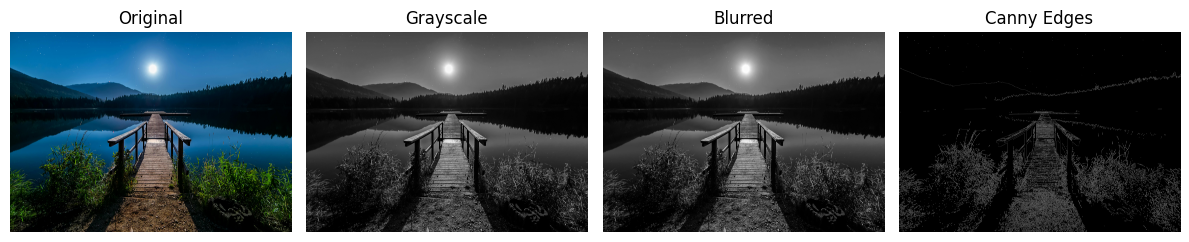

In [4]:
# STEP 1: Install OpenCV (usually already available, but just in case)
!pip install opencv-python-headless

# STEP 2: Import libraries
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from io import BytesIO
from PIL import Image

# STEP 3: Upload image from your computer
uploaded = files.upload()

# STEP 4: Read the uploaded image
for filename in uploaded.keys():
    img = Image.open(BytesIO(uploaded[filename]))  # Load with PIL
    img = img.convert('RGB')                       # Ensure RGB
    img_np = np.array(img)                         # Convert to NumPy array
    img_cv2 = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV

# STEP 5: Process the image
gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# STEP 6: Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_np)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
import cv2

# Load video file
video_path = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.behance.net%2Fgallery%2F55389655%2Fgif-Collection-Two&psig=AOvVaw1C_xRaAIGYdWelAoq9VAgG&ust=1757603396563000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCICc0oa9zo8DFQAAAAAdAAAAABAV'
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Display the frame
    cv2.imshow('Video Frame', frame)

    # Exit on 'q' key press
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [9]:
import cv2
from IPython.display import display, Image, clear_output
import PIL.Image
import io

# Open video
cap = cv2.VideoCapture('https://www.google.com/url?sa=i&url=https%3A%2F%2Fblog.google%2Fproducts%2Fsearch%2Fmaking-it-easier-find-and-share-gifs-google%2F&psig=AOvVaw1C_xRaAIGYdWelAoq9VAgG&ust=1757603396563000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCICc0oa9zo8DFQAAAAAdAAAAABAE')

# Loop through frames
frame_count = 0
while cap.isOpened() and frame_count < 50:  # limit to 50 frames for demo
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert to PIL Image
    img = PIL.Image.fromarray(frame_rgb)

    # Display in notebook
    with io.BytesIO() as output:
        img.save(output, format="PNG")
        display(Image(data=output.getvalue()))

    clear_output(wait=True)
    frame_count += 1

cap.release()
